Exploration and Classification of FashionMNIST through Convolutional Neural Network

In [ ]:
#Downloading needed dependencies
%pip install tensorflow
%pip install keras

In [1]:
#Importing needed dependencies
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers, models
import csv
import os
from datetime import datetime

In [2]:
#Read in the data:

# Loading Fashion MNIST dataset from TensorFlow datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the training and test dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Data Organization & Visualizations

In [3]:
# Normalize pixel values of images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check shape of dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Reshaping the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Check shape of dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


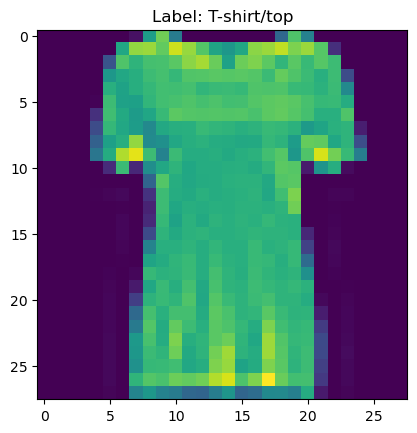

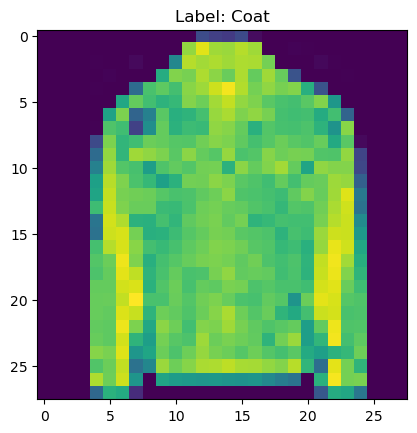

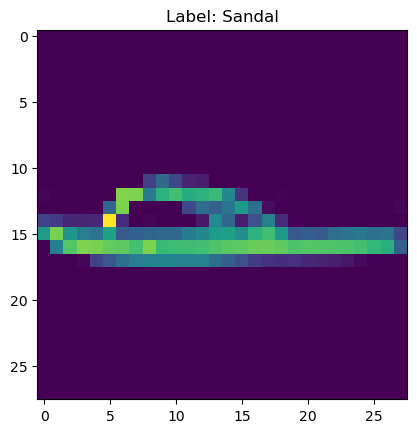

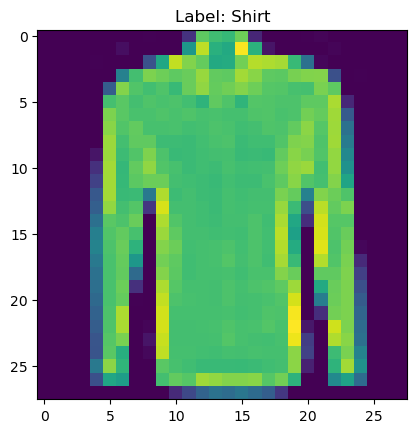

In [5]:
# Defining label names for Fashion MNIST dataset to check images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking and displaying images with corresponding labels
image_index = 10
image = train_images[image_index, :].reshape((28, 28))
plt.imshow(image)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

image_index = 29
image0 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image0)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

image_index = 30
image1 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image1)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

image_index = 40
image2 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image2)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()


Creating the Model: 

These notes reflect observations and alterations to the model when training. The model was reset and recompiled when alterations were made and all changes are logged here.
**Ouput 1 and 2:** <br>
After running the model twice, I noticed the training accuracy was much higher than the validation accuracy. This indicates that the model is overfitting and 'memorizing' the data rather than finding patterns to better classify images. I added L2 regularization, Dropout, and Early Stopping from training 3 and onward in order to mitigate this overfitting. <br>
**Outputs 3 - 6:** <br>
After running the model four times, it plateued at around 87% accuracy on the training accuracy and 88% on the testing accuracy. I wanted to try for something a little higher and decided to remove dropout from the model to see if that was able to improve accuracy without causing overfitting. <br>
**Output 7:** <br>
Removing the dropout led to better results, especially when comparing the accuracy and the val_accuracy & the loss and val_loss. Near the final few epochs, there does seem to be a few indications of overfitting. I've decided to increase the number of epochs to 60 in order to see if the model regulates out as it runs more or if it will overfit worse. If not, I will decrease the number of epochs to 15, as there seems to be the highest indicators of overfitting after this value. <br>
**Output 8 & 9:** <br>
After increasing the epochs to 60, I have found that the increased distance between the accuracy and val_accuracy was due to overfitting. The model stopped early after epoch 17 due to a lack of improvement in the val_loss. During run 9, it stopped after only 4 epochs and all the values had identical or nearly identical respective values. I will be resetting the model and setting the number of epochs to 15. <br>
**Output 10 - 13:** <br>
After resetting to 15 epochs. Initially, this did still stop early at 8, there is less indications of overfitting and the training lines on the graphs seem to be fairly smooth and well aligned with the validation line. If this continues on to indicate overfitting, I may add dropout back into the first convolutional layer. After running it a few more times, the number of epochs ran before early stopping occurs continues decreasing. The gap between the accuracy and val_accuracy is approximately 1 percentage point and the test_accuracy decreased after the most recent test. <br>
**Output 14:** <br>
After adding dropout back into the first layer at 0.25, the accuracy seemed to increase well without super large gaps between accuracy and val_accuracy. <br>

In [32]:
# Define the CNN model
model = models.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))

# Convolutional Layer 1 with L2 regularization and Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
# Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Convolutional Layer 2 with L2 regularization and Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
# Dropout to prevent overfitting
#model.add(layers.Dropout(0.25))

# Flatten the output to feed into fully connected layers
model.add(layers.Flatten())

# Fully connected layer with L2 regularization and Dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# Dropout to prevent overfitting - larger in fully connected layers
#model.add(layers.Dropout(0.5))

# Output layer with 10 classes
model.add(layers.Dense(10, activation='softmax'))

In [33]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# adding early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Training the Model & Outcomes:
> To train the model, run this cell and all below. Rerunning the 'Create the Model' cells can reset the model. 

In [46]:
# Train the model
    # added early_stopping and increased epochs for early stopping to take effect trial 3 and onward to prevent overfitting
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9044 - loss: 0.3437 - val_accuracy: 0.8999 - val_loss: 0.3525
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9047 - loss: 0.3436 - val_accuracy: 0.8910 - val_loss: 0.3727
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9027 - loss: 0.3421 - val_accuracy: 0.9012 - val_loss: 0.3543
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9053 - loss: 0.3402 - val_accuracy: 0.9018 - val_loss: 0.3454
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9066 - loss: 0.3378 - val_accuracy: 0.8882 - val_loss: 0.3734
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9041 - loss: 0.3392 - val_accuracy: 0.9032 - val_loss: 0.3531
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9053 - loss: 0.3387 - val_accuracy: 0.8892 - val_loss: 0.3859


In [47]:
# -- SAVING TRAIN ACCURACY OF MODEL BY EPOCH --

# CSV file to store training results
training_results_file = 'training_results.csv'

# To append new results
if not os.path.exists(training_results_file):
    with open(training_results_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Timestamp', 'Epoch', 'Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss'])

# Append training results to the CSV file
with open(training_results_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    timestamp = datetime.now().strftime("%d%m%Y_%H%M%S")
    
    # Loop through each epoch to save results
    for epoch in range(len(history.history['accuracy'])):
        train_acc = history.history['accuracy'][epoch]
        val_acc = history.history['val_accuracy'][epoch]
        train_loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        
        # Append epoch-wise training and validation results
        writer.writerow([timestamp, epoch + 1, train_acc, val_acc, train_loss, val_loss])

print(f'Training results saved to {training_results_file}')

Training results saved to training_results.csv


In [48]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8988 - loss: 0.3668
Test accuracy: 0.8974999785423279


In [49]:
# -- SAVING TEST ACCURACY OF MODEL --

# CSV file to store test results
test_results_file = 'test_results.csv'

# Append test results to a separate CSV file
if not os.path.exists(test_results_file):
    with open(test_results_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Timestamp', 'Test Accuracy', 'Test Loss'])

with open(test_results_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    # Append test accuracy and loss with timestamp
    writer.writerow([timestamp, test_acc, test_loss])

print(f'Test results saved to {test_results_file}')


Test results saved to test_results.csv


Outcomes:

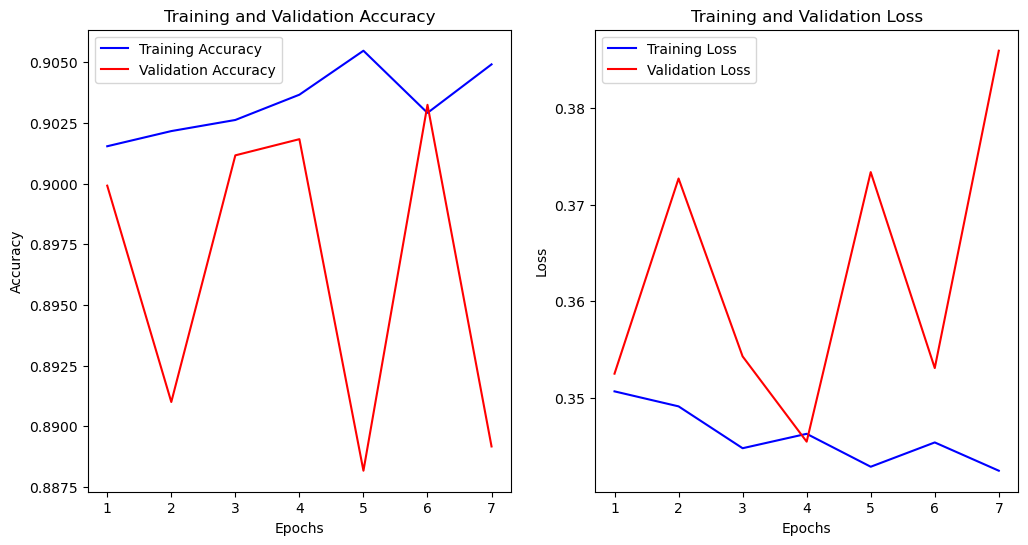

Accuracy and loss plot saved as accuracy_loss_plots\accuracy_loss_plot_091024_022627.png


In [50]:
# -- TRAINING & VALIDATION ACCURACY & LOSS PLOTS --
# Plot training & validation accuracy values
epochs = range(1, len(history.history['accuracy']) + 1)
# Generate timestamp
timestamp = datetime.now().strftime('%d%m%y_%H%M%S')

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the plot
accuracy_loss_plot_filename = f'accuracy_loss_plots\\accuracy_loss_plot_{timestamp}.png'
plt.savefig(accuracy_loss_plot_filename)
plt.show()
print(f'Accuracy and loss plot saved as {accuracy_loss_plot_filename}')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification report saved as classification_report.csv
Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.93      0.87      0.90      1000
           4       0.82      0.85      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.95      0.94      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



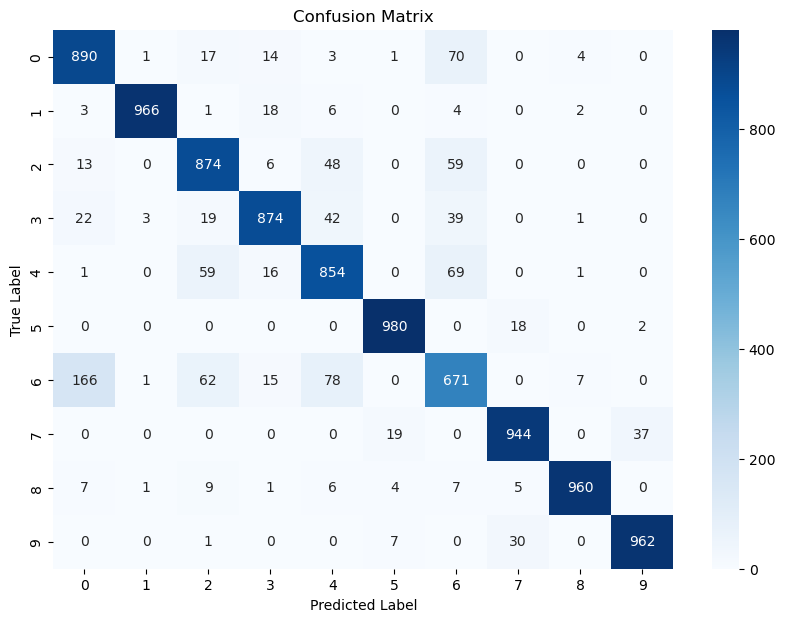

Confusion matrix saved as confusion_matrix_plots\confusion_matrix_09102024_022629.png


In [51]:
# -- CLASSIFICATION REPORT --

# Predict test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report as a dictionary
report_dict = classification_report(test_labels, y_pred_classes, output_dict=True)

# Save Classification report
report_df = pd.DataFrame(report_dict).transpose()
timestamp = datetime.now().strftime("%d%m%Y_%H%M%S")
report_df['Timestamp'] = timestamp
classification_report_filename = 'classification_report.csv'

if os.path.exists(classification_report_filename):
    existing_report_df = pd.read_csv(classification_report_filename, index_col=0)
    combined_report_df = pd.concat([existing_report_df, report_df], axis=0)
else:
    combined_report_df = report_df

combined_report_df.to_csv(classification_report_filename)

print(f'Classification report saved as {classification_report_filename}')

# Ouput Classification Report
print("Classification Report:\n")
print(classification_report(test_labels, y_pred_classes))

# -- CONFUSION MATRIX --

# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

confusion_matrix_filename = f'confusion_matrix_plots\confusion_matrix_{timestamp}.png'
plt.savefig(confusion_matrix_filename)
plt.show()
print(f'Confusion matrix saved as {confusion_matrix_filename}')